#Cleaning and Wrangling:

Creation of sets for further EDA
> ### Preliminary: *Are the reports of rats equally distributed throughout the boroughs?*

>> Does one borough have more reports of rats per population than the other?
where are the most reports by year, month....

>>

Do the pick-up days and frequency affect the number of sightings?

Does the type of refuge?

sightings to frequency
sightings to population



Possible Further exploration into:

>Sightings to vendor

>Refuge stats compared to US

>Employment stats and truck violations.


#Reported Sightings
---This is the original data for the one... READ ME FILE WILL BE ADDED> there are about 6 sets used to from the census and Furman center for the rats to compile a more comprehensive city/neighborhood list and population data
---DSNY is composed of 3 sets/ also

2 flows.

#####import Rat Sightings https://data.cityofnewyork.us/Social-Services/Rat-Sightings/3q43-55fe






Dataset Dictionary have a read me file....



* Bronx Central Bronx 10453, 10457, 10460
* Bronx Park and Fordham 10458, 10467, 10468
* High Bridge and Morrisania 10451, 10452, 10456
* Hunts Point and Mott Haven 10454, 10455, 10459, 10474
* Kingsbridge and Riverdale 10463, 10471
* Northeast Bronx 10466, 10469, 10470, 10475
* Brooklyn Central Brooklyn 11212, 11213, 11216, 11233, 11238
* Southwest Brooklyn 11209, 11214, 11228
* Borough Park 11204, 11218, 11219, 11230
* Canarsie and Flatlands 11234, 11236, 11239
* Southern Brooklyn 11223, 11224, 11229, 11235
* Northwest Brooklyn 11201, 11205, 11215, 11217, 11231
* Flatbush 11203, 11210, 11225, 11226
* East New York and New Lots 11207, 11208
* Greenpoint 11211, 11222
* Sunset Park 11220, 11232
* Bushwick and Williamsburg 11206, 11221, 11237
* Manhattan Central Harlem 10026, 10027, 10030, 10037, 10039
* Chelsea and Clinton 10001, 10011, 10018, 10019, 10020, 10036
* East Harlem 10029, 10035
* Gramercy Park and Murray Hill 10010, 10016, 10017, 10022
* Greenwich Village and Soho 10012, 10013, 10014
* Lower Manhattan 10004, 10005, 10006, 10007, 10038, 10280
* Lower East Side 10002, 10003, 10009
* Upper East Side 10021, 10028, 10044, 10065, 10075, 10128
* Upper West Side 10023, 10024, 10025
* Inwood and Washington Heights 10031, 10032, 10033, 10034, 10040
* Queens Northeast Queens 11361, 11362, 11363, 11364
* North Queens 11354, 11355, 11356, 11357, 11358, 11359, 11360
* Central Queens 11365, 11366, 11367
* Jamaica 11412, 11423, 11432, 11433, 11434, 11435, 11436
* Northwest Queens 11101, 11102, 11103, 11104, 11105, 11106
* West Central Queens 11374, 11375, 11379, 11385
* Rockaways 11691, 11692, 11693, 11694, 11695, 11697
* Southeast Queens 11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429
* Southwest Queens 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421
* West Queens 11368, 11369, 11370, 11372, 11373, 11377, 11378
* Staten Island Port Richmond 10302, 10303, 10310
* South Shore 10306, 10307, 10308, 10309, 10312
* Stapleton and St. George 10301, 10304, 10305
* Mid-Island 10314

#initial files joined/cleaned with Tableau Prep

==> step1_ratsightings = (Modified_Zip_Code_Tabulation_Areas__MODZCTA_.csv
Rat_Sightings.csv)


==> dsny_frequency = (DSNY_Districts, DSNY_Frequencies, NYC_Community_Board_dist,Modified_Zip_Code_Tabulation_Areas__MODZCTA_.csv)




#Import  needs cleaned up

In [ ]:
import os
import requests
import glob
import pandas as pd
!pip install geopandas
import geopandas as gpd
import numpy as np
import re # flexable way to search for matching text in strings Regular Expressions
import seaborn as sns # plotting and graphing, built upon the matplotlib library.
import matplotlib.pyplot as plt
#import geopy #ploting by location longitude and latitude

from math import pi
#from geopy.geocoders import Nominatim as nm
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()
#these populated on their own
from zmq.constants import THREAD_NAME_PREFIX
from pandas.core.groupby import groupby

#additional imports from notbook reference
import plotly as ply
import plotly.express as px
import plotly.io as pio
import scipy as sc
import sympy as sy
import matplotlib as matplot
import statistics as stat
### some imports are yet to be used...cleaning up and still exploring past analysis usage.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the csv(s)
missing_values=['nan','-', '']
rats = pd.read_csv('/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/step1_ratsightings.csv', na_values = missing_values)
dsny = pd.read_csv('/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/dsny_frequency.csv', na_values = missing_values)
#Unique Key as Index (after import check for duplicates then index unique key after sort of key and created date.)
#drop false leaves the index columns in when reindexing

**put back the unique key as index then multilevel index
 Optionally, you can also create multilevel columns
columns = pd.MultiIndex.from_tuples(
                                    [('subject1', 'Networking'),
                                     ('subject2', 'Web Engineering'),
                                     ('subject3', 'Complier Design')
                                    ])

NEED MULTI INDEX IF I UNDERSTAND CORRECTLY need to group the data and then use linear regression on small 2 column sets Merge the larger sets and perform Decision tree/ logistic

#EDA DSNY

In [ ]:
print('Info:', dsny.info())
print('top 5 rows:', dsny.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_code            606 non-null    int64  
 1   modzcta              606 non-null    int64  
 2   label                606 non-null    object 
 3   zcta                 606 non-null    object 
 4   district             606 non-null    object 
 5   districtcode         606 non-null    int64  
 6   section              606 non-null    object 
 7   community_board      606 non-null    object 
 8   council_district     606 non-null    int64  
 9   schedulecode         606 non-null    object 
 10  neighborhoods        606 non-null    object 
 11  nta                  606 non-null    object 
 12  cb_office_address    606 non-null    object 
 13  pop_est              606 non-null    int64  
 14  frequency            606 non-null    object 
 15  bulk_day1            606 non-null    obj

In [ ]:
print('Rows, Columns:', dsny.shape)
#610, 31

Rows, Columns: (606, 34)


#EDA RATS

In [ ]:
print('Info:', rats.info())
print('top 5 rows:', rats.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210120 entries, 0 to 210119
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unique_key                  210120 non-null  int64  
 1   created_date                210120 non-null  object 
 2   due_date                    121125 non-null  object 
 3   closed_date                 194098 non-null  object 
 4   location_type               210108 non-null  object 
 5   borough                     210118 non-null  object 
 6   incident_zip                210120 non-null  int64  
 7   community_board             210118 non-null  object 
 8   city                        207123 non-null  object 
 9   incident_address            210120 non-null  object 
 10  street_name                 210119 non-null  object 
 11  cross_street _1             191530 non-null  object 
 12  cross_street_2              191533 non-null  object 
 13  intersection_s

In [ ]:
print('Rows, Columns:', rats.shape)
#80481, 25 without Unique Key as Index Rows, Columns: (208789, 28 ratsightings...no change in names or dropped collumns

Rows, Columns: (210120, 29)


Replacing the double checks(null)s

In [ ]:
rats.index.is_unique

True

In [ ]:
rats.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

In [ ]:
rats.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,45747140,3/3/2020 6:15:50 AM,NaN,3/3/2020 6:15:50 AM,Commercial Building,BROOKLYN,11207,16 BROOKLYN,BROOKLYN,1746 BROADWAY,...,188102.0,40.682939,-73.910522,"(40.68293851538748, -73.91052156400578)",sightings,11207.0,11207,11207,91972.0,MULTIPOLYGON (((-73.90347629824663 40.67550542...
1,56989476,3/8/2023 2:27:46 AM,NaN,3/8/2023 2:27:46 AM,Construction Site,BROOKLYN,11215,06 BROOKLYN,BROOKLYN,205 14 STREET,...,182243.0,40.666891,-73.990293,"(40.666891259708756, -73.99029264560139)",sightings,11215.0,11215,11215,70156.0,MULTIPOLYGON (((-73.99822639169714 40.67120366...
2,46533529,6/18/2020 8:17:38 PM,NaN,NaN,1-2 Family Dwelling,BROOKLYN,11249,01 BROOKLYN,BROOKLYN,20 SOUTH 4 STREET,...,199125.0,40.713224,-73.967175,"(40.71322419170144, -73.96717477471884)",sightings,NaN,NaN,NaN,NaN,NaN
3,50422420,4/29/2021 5:18:50 PM,NaN,5/3/2021 6:30:22 AM,Other (Explain Below),MANHATTAN,10003,03 MANHATTAN,NEW YORK CITY,336 EAST 6 STREET,...,204137.0,40.726985,-73.987578,"(40.72698493398125, -73.98757795763353)",sightings,10003.0,10003,10003,54682.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...
4,38983405,4/19/2018 12:00:00 AM,05/19/2018 04:59:18 PM,4/19/2018 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11216,03 BROOKLYN,BROOKLYN,462 NOSTRAND AVENUE,...,188153.0,40.683102,-73.950132,"(40.683102482748794, -73.95013179905419)",sightings,11216.0,11216,11216,56308.0,MULTIPOLYGON (((-73.94773018706293 40.66971511...


In [ ]:
#check min max report dates
min_date = min(rats['created_date'])
max_date = max(rats['created_date'])
print('Date range: ', min_date, ' - ', max_date)

Date range:  1/1/2010 11:20:45 AM  -  9/9/2022 9:59:51 AM


cant get index to stay... or is it me? reindex keeping this column that is sorted?

In [ ]:
rats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210120 entries, 0 to 210119
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unique_key                  210120 non-null  int64  
 1   created_date                210120 non-null  object 
 2   due_date                    121125 non-null  object 
 3   closed_date                 194098 non-null  object 
 4   location_type               210108 non-null  object 
 5   borough                     210118 non-null  object 
 6   incident_zip                210120 non-null  int64  
 7   community_board             210118 non-null  object 
 8   city                        207123 non-null  object 
 9   incident_address            210120 non-null  object 
 10  street_name                 210119 non-null  object 
 11  cross_street _1             191530 non-null  object 
 12  cross_street_2              191533 non-null  object 
 13  intersection_s

the dates still shows as objects.

In [ ]:
rats.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

In [ ]:
#checking the index again no sort going up to reindex nesscisary?
rats.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,45747140,3/3/2020 6:15:50 AM,NaN,3/3/2020 6:15:50 AM,Commercial Building,BROOKLYN,11207,16 BROOKLYN,BROOKLYN,1746 BROADWAY,...,188102.0,40.682939,-73.910522,"(40.68293851538748, -73.91052156400578)",sightings,11207.0,11207,11207,91972.0,MULTIPOLYGON (((-73.90347629824663 40.67550542...
1,56989476,3/8/2023 2:27:46 AM,NaN,3/8/2023 2:27:46 AM,Construction Site,BROOKLYN,11215,06 BROOKLYN,BROOKLYN,205 14 STREET,...,182243.0,40.666891,-73.990293,"(40.666891259708756, -73.99029264560139)",sightings,11215.0,11215,11215,70156.0,MULTIPOLYGON (((-73.99822639169714 40.67120366...
2,46533529,6/18/2020 8:17:38 PM,NaN,NaN,1-2 Family Dwelling,BROOKLYN,11249,01 BROOKLYN,BROOKLYN,20 SOUTH 4 STREET,...,199125.0,40.713224,-73.967175,"(40.71322419170144, -73.96717477471884)",sightings,NaN,NaN,NaN,NaN,NaN
3,50422420,4/29/2021 5:18:50 PM,NaN,5/3/2021 6:30:22 AM,Other (Explain Below),MANHATTAN,10003,03 MANHATTAN,NEW YORK CITY,336 EAST 6 STREET,...,204137.0,40.726985,-73.987578,"(40.72698493398125, -73.98757795763353)",sightings,10003.0,10003,10003,54682.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...
4,38983405,4/19/2018 12:00:00 AM,05/19/2018 04:59:18 PM,4/19/2018 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11216,03 BROOKLYN,BROOKLYN,462 NOSTRAND AVENUE,...,188153.0,40.683102,-73.950132,"(40.683102482748794, -73.95013179905419)",sightings,11216.0,11216,11216,56308.0,MULTIPOLYGON (((-73.94773018706293 40.66971511...


In [ ]:
rats['incident_zip'].nlargest(n=15)

19435     11697
25640     11697
48480     11697
135054    11697
75003     11695
1312      11694
1485      11694
2118      11694
2267      11694
3920      11694
3956      11694
4757      11694
6754      11694
9910      11694
10003     11694
Name: incident_zip, dtype: int64

In [ ]:
rats.sort_values(by=['incident_zip']).head(5)

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
141379,29057903,10/12/2014 12:00:00 AM,11/11/2014 03:29:43 PM,10/15/2014 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK SOUTH,...,218237.0,40.765684,-73.976235,"(40.765684114893894, -73.9762353119456)",sightings,NaN,NaN,NaN,NaN,NaN
12385,34335842,9/16/2016 12:00:00 AM,10/16/2016 12:57:17 PM,10/18/2016 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,LENOX AVENUE,...,229819.0,40.797466,-73.951700,"(40.7974659648698, -73.95170030179558)",sightings,NaN,NaN,NaN,NaN,NaN
133704,37791806,11/27/2017 12:00:00 AM,12/27/2017 06:10:34 PM,12/1/2017 12:00:00 AM,Other (Explain Below),MANHATTAN,83,10 MANHATTAN,CENTRAL PARK,110 LENOX AVENUE,...,229858.0,40.797573,-73.951570,"(40.79757295469069, -73.95157020157765)",sightings,NaN,NaN,NaN,NaN,NaN
32772,40031244,8/17/2018 12:00:00 AM,09/16/2018 12:13:48 AM,8/23/2018 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK WEST,...,221368.0,40.774278,-73.977370,"(40.77427812337319, -73.9773695445951)",sightings,NaN,NaN,NaN,NaN,NaN
140972,28881497,9/15/2014 12:00:00 AM,10/15/2014 05:12:53 PM,10/8/2014 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK WEST,...,223262.0,40.779476,-73.973573,"(40.7794758468835, -73.97357287287964)",sightings,NaN,NaN,NaN,NaN,NaN


In [ ]:
rats_sorted = rats.sort_values(by=['created_date'], ascending=True)

In [ ]:
rats_sorted.reset_index(drop=True)

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,15633054,1/1/2010 11:20:45 AM,01/31/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,208930.0,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",sightings,11365.0,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...
1,15634275,1/1/2010 11:46:51 PM,01/31/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,190346.0,40.689131,-73.981534,"(40.68913109029156, -73.98153436958206)",sightings,11201.0,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...
2,15633896,1/1/2010 12:11:51 PM,01/31/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,233426.0,40.807367,-73.954388,"(40.807367287308594, -73.95438787024435)",sightings,10027.0,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...
3,15633897,1/1/2010 12:12:04 PM,01/31/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,250983.0,40.855513,-73.890006,"(40.85551279775197, -73.89000626904053)",sightings,10458.0,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...
4,15633828,1/1/2010 2:15:27 PM,01/31/2010 02:15:27 PM,NaN,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,170864.0,40.635654,-73.967757,"(40.63565426900362, -73.96775698011807)",sightings,11218.0,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,55348031,9/9/2022 9:38:01 PM,NaN,9/9/2022 9:38:01 PM,Commercial Building,MANHATTAN,10012,02 MANHATTAN,NEW YORK CITY,54 MACDOUGAL STREET,...,204305.0,40.727447,-74.002630,"(40.72744669308238, -74.00263018635036)",sightings,10012.0,10012,10012,23411.0,MULTIPOLYGON (((-74.00408405811187 40.72537431...
210116,55351913,9/9/2022 9:39:20 PM,NaN,9/9/2022 9:39:20 PM,3+ Family Apt. Building,MANHATTAN,10026,10 MANHATTAN,NEW YORK CITY,312 MANHATTAN AVENUE,...,231932.0,40.803268,-73.958115,"(40.80326808253412, -73.9581147002217)",sightings,10026.0,10026,10026,39363.0,MULTIPOLYGON (((-73.96200720826798 40.80550908...
210117,55348032,9/9/2022 9:45:11 AM,NaN,9/9/2022 9:45:11 AM,Parking Lot/Garage,MANHATTAN,10019,04 MANHATTAN,NEW YORK CITY,725 TENTH AVENUE,...,217724.0,40.764278,-73.992094,"(40.764278242124526, -73.99209424765353)",sightings,10019.0,multiple,"10019, 10020, 10103, 10111, 10112",43703.0,MULTIPOLYGON (((-74.00114791977168 40.76202777...
210118,55346704,9/9/2022 9:50:04 AM,NaN,9/9/2022 9:50:04 AM,Commercial Building,MANHATTAN,10009,03 MANHATTAN,NEW YORK CITY,93 1/2 EAST 7 STREET,...,204076.0,40.726817,-73.985337,"(40.7268172403236, -73.98533748091528)",sightings,10009.0,10009,10009,57925.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...


In [ ]:
print('Borough Value counts after dropping columns and nulls:\n',rats_sorted['borough'].value_counts())

Borough Value counts after dropping columns and nulls:
 BROOKLYN         76566
MANHATTAN        54747
BRONX            39461
QUEENS           31107
STATEN ISLAND     8237
Name: borough, dtype: int64


#Cleaning DSNY

In [ ]:
dsny1 = dsny.drop_duplicates()
dsny1.shape == dsny.shape #(80475, 24)  (80481, 24)

True

In [ ]:
dsny1 = pd.DataFrame(dsny1)

<Axes: >

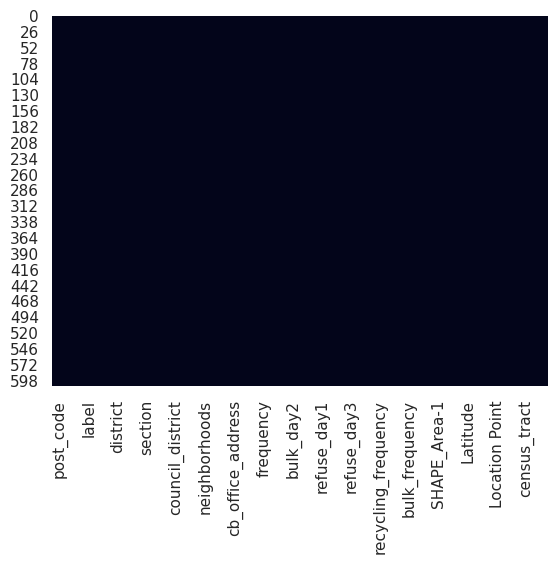

In [ ]:
# check missing values in different columns via heatmap
sns.heatmap(dsny1.isnull(), cbar=False)

In [ ]:
#dsny1.dropna()
#dropping columns
# dsny1 = dsny1.drop([ 'FID', 'FID-1', 'STATEPLANE_LABELX', 'STATEPLANE_LABELY', 'STATEPLANE_SNAPPEDX',
#        'STATEPLANE_SNAPPEDY', 'GlobalID'], axis=1)


In [ ]:
dsny.columns

Index(['post_code', 'modzcta', 'label', 'zcta', 'district', 'districtcode',
       'section', 'community_board', 'council_district', 'schedulecode',
       'neighborhoods', 'nta', 'cb_office_address', 'pop_est', 'frequency',
       'bulk_day1', 'bulk_day2', 'bulk_day3', 'refuse_day1', 'refuse_day2',
       'refuse_day3', 'refuse_frequency', 'recycling_frequency',
       'organic_frequency', 'bulk_frequency', 'ObjectID', 'SHAPE_Area-1',
       'SHAPE_Length-1', 'Latitude', 'Longitude', 'Location Point',
       'multipolygon-1', 'census_tract', 'GlobalID'],
      dtype='object')

In [ ]:
dsny1.head()

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
0,11385,11385,11385,11385,QW05,405,QW051,Community Board 5,30,4051E,...,Wed,412,0.002083,0.223740,40.700875,-73.893734,POINT (-73.893734 40.700875),MULTIPOLYGON (((-73.88770340399998 40.73429958...,577,{498F4BE7-A870-4D7D-AAA4-22F88AC15FE6}
1,11232,11232,11232,11232,BKS07,307,BKS073,Community Board 7,38,3073D,...,"Tue, Fri",227,0.001030,0.287433,40.650316,-74.008166,POINT (-74.008166 40.650316),MULTIPOLYGON (((-73.98017304799998 40.66116290...,82,{AB947263-8808-4F66-942F-985F5BF265E9}
2,11209,11209,11209,"11209, 11425",BKS10,310,BKS102,Community Board 10,43,3102E,...,Wed,249,0.001101,0.140901,40.624842,-74.024525,POINT (-74.024525 40.624842),MULTIPOLYGON (((-74.03231229499994 40.64404745...,138,{6CBE9191-CF75-4470-A89E-DEAE0936AB58}
3,11357,11357,11357,"11351, 11357",QE07,407,QE072,Community Board 7,19,4072C,...,Thu,434,0.003254,0.442474,40.770483,-73.835639,POINT (-73.835639 40.770483),MULTIPOLYGON (((-73.83972970299999 40.76515397...,907,{600D03CD-21FC-40BB-8ED4-0AAC26E90B98}
4,11219,11219,11219,11219,BKS12,312,BKS122,Community Board 12,44,3122D,...,"Tue, Fri",278,0.000984,0.165920,40.629302,-73.998083,POINT (-73.998083 40.629302),MULTIPOLYGON (((-73.97139775099998 40.64826603...,192,{7D89729A-7373-401E-853A-5044EBEA8556}


In [ ]:
dsny1['Location Point'] = dsny1['Location Point'].str.replace('POINT', '')

In [ ]:
dsny.bulk_day1.unique()

array(['Wed', 'Tue', 'Thu', 'Unspecified', 'Mon', 'Fri', 'Sat'],
      dtype=object)

#Cleaning Rats

In [ ]:
# Percentage by lambda and DataFrame.apply() method.
#  rat13 =   rat1.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

In [ ]:
rats_sorted.loc[~rats_sorted.index.duplicated(), :].head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
173104,15633054,1/1/2010 11:20:45 AM,01/31/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,208930.0,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",sightings,11365.0,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...
38908,15634275,1/1/2010 11:46:51 PM,01/31/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,190346.0,40.689131,-73.981534,"(40.68913109029156, -73.98153436958206)",sightings,11201.0,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...
172919,15633896,1/1/2010 12:11:51 PM,01/31/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,233426.0,40.807367,-73.954388,"(40.807367287308594, -73.95438787024435)",sightings,10027.0,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...
61527,15633897,1/1/2010 12:12:04 PM,01/31/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,250983.0,40.855513,-73.890006,"(40.85551279775197, -73.89000626904053)",sightings,10458.0,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...
175959,15633828,1/1/2010 2:15:27 PM,01/31/2010 02:15:27 PM,NaN,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,170864.0,40.635654,-73.967757,"(40.63565426900362, -73.96775698011807)",sightings,11218.0,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...


### Dropping duplicates/ columns/ nulls

In [ ]:
rat1 = rats_sorted.drop_duplicates()
rat1.shape == rats_sorted.shape

True

In [ ]:
rat1 = pd.DataFrame(rat1.sort_values(['created_date','unique_key'], ascending=True))

<Axes: >

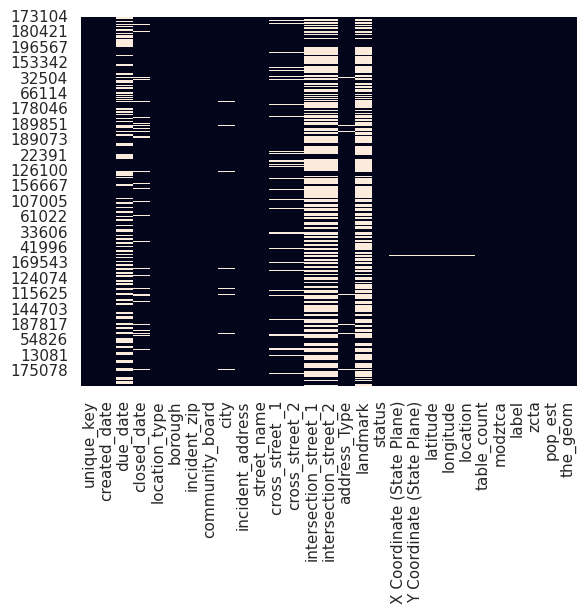

In [ ]:
#dropping columns that are unneeded or too many null values
# rat1 = rat1.drop(['cities_acceptable_irs', 'irs_estimated_population', 'landmark', 'marg_error'], axis=1)
# check missing values in different columns via heatmap
sns.heatmap(rat1.isnull(), cbar=False)

In [ ]:
rat1.columns

Index(['unique_key', 'created_date', 'due_date', 'closed_date',
       'location_type', 'borough', 'incident_zip', 'community_board', 'city',
       'incident_address', 'street_name', 'cross_street _1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_Type',
       'landmark', 'status', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location',
       'table_count', 'modztca', 'label', 'zcta', 'pop_est', 'the_geom'],
      dtype='object')

####Dropping final nulls for analysis

In [ ]:
rat1.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

In [ ]:
missing_counts =   rat1.isnull().sum().sort_values(ascending = False)
percent = (  rat1.isnull().sum()*100/  rat1.shape[0]).sort_values(ascending = False)

In [ ]:
missing_rat1 = pd.concat([missing_counts, percent], axis = 1, keys = ['Counts', '%'])
print(f' Missing values: \n{missing_rat1}')

 Missing values: 
                            Counts          %
landmark                    126987  60.435465
intersection_street_1       117884  56.103179
intersection_street_2       117848  56.086046
due_date                     88995  42.354369
cross_street _1              18590   8.847325
cross_street_2               18587   8.845898
closed_date                  16022   7.625167
address_Type                  4444   2.114982
city                          2997   1.426328
latitude                      1537   0.731487
location                      1537   0.731487
longitude                     1537   0.731487
X Coordinate (State Plane)    1537   0.731487
Y Coordinate (State Plane)    1537   0.731487
modztca                       1079   0.513516
label                         1079   0.513516
zcta                          1079   0.513516
pop_est                       1079   0.513516
the_geom                      1079   0.513516
location_type                   12   0.005711
community_board 

#need to remove o values in population

In [ ]:
# drop duplicate data (== gives the boolean value)
rat2 = rat1.drop_duplicates()
rat2.shape == rat1.shape

True

###pd.datetime/ created YQMWD

In [ ]:
#Converting the date column to its specified data type
rat1['created_date'] = pd.to_datetime(rat1['created_date'])

In [ ]:
# Creating 4 new columns for easy querying
rat1['year']= rat1.created_date.dt.year
rat1['quarter']= rat1.created_date.dt.quarter
rat1['month'] = rat1.created_date.dt.month
rat1['weekday'] = rat1.created_date.dt.weekday
rat1['day'] = rat1.created_date.dt.day
rat1['hour'] = rat1.created_date.dt.hour
rat1.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,label,zcta,pop_est,the_geom,year,quarter,month,weekday,day,hour
173104,15633054,2010-01-01 11:20:45,01/31/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...,2010,1,1,4,1,11
38908,15634275,2010-01-01 23:46:51,01/31/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...,2010,1,1,4,1,23
172919,15633896,2010-01-01 12:11:51,01/31/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...,2010,1,1,4,1,12
61527,15633897,2010-01-01 12:12:04,01/31/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...,2010,1,1,4,1,12
175959,15633828,2010-01-01 14:15:27,01/31/2010 02:15:27 PM,NaN,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...,2010,1,1,4,1,14


In [ ]:
#check min max crash dates
min_date = min(rat1['created_date'])
max_date = max(rat1['created_date'])
print(f'Date range:  {min_date}  -  {max_date}')

Date range:  2010-01-01 08:29:58  -  2023-07-03 02:05:32


#VALUES

YEARS... limit by years then months. 2022 and 2023 first

In [ ]:
top_10_unique_zips = rat1['incident_zip'].value_counts().nlargest(10).index.tolist()

In [ ]:
top_10_unique_zips

[11221, 10025, 11216, 11238, 11233, 11226, 11237, 11385, 10467, 11207]

In [ ]:
top_values = rat1.nlargest(10, 'incident_zip', keep='first')

In [ ]:
top_values

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,label,zcta,pop_est,the_geom,year,quarter,month,weekday,day,hour
135054,37457172,2017-10-17 00:00:00,11/16/2017 03:51:55 PM,1/2/2018 12:00:00 AM,1-2 Family Mixed Use Building,QUEENS,11697,14 QUEENS,BREEZY POINT,232 HILLSIDE AVENUE,...,11697,11697,3540.0,MULTIPOLYGON (((-73.86288509369598 40.57605877...,2017,4,10,1,17,0
19435,46672443,2020-06-28 10:27:01,NaN,NaN,1-2 Family Dwelling,QUEENS,11697,14 QUEENS,BREEZY POINT,20 DORIS LANE,...,11697,11697,3540.0,MULTIPOLYGON (((-73.86288509369598 40.57605877...,2020,2,6,6,28,10
25640,39867593,2018-07-29 00:00:00,08/28/2018 11:51:08 AM,1/16/2019 12:00:00 AM,Commercial Building,QUEENS,11697,Unspecified QUEENS,BREEZY POINT,1 BEACH 193RD ST,...,11697,11697,3540.0,MULTIPOLYGON (((-73.86288509369598 40.57605877...,2018,3,7,6,29,0
48480,47549267,2020-09-12 04:52:01,NaN,NaN,Commercial Building,QUEENS,11697,14 QUEENS,BREEZY POINT,202-30 ROCKAWAY POINT BOULEVARD,...,11697,11697,3540.0,MULTIPOLYGON (((-73.86288509369598 40.57605877...,2020,3,9,5,12,4
75003,46076535,2020-04-27 10:38:00,NaN,4/27/2020 10:38:00 AM,Commercial Building,QUEENS,11695,84 QUEENS,QUEENS,402 BEACH 169 STREET,...,NaN,NaN,NaN,NaN,2020,2,4,0,27,10
10003,27265851,2014-01-27 00:00:00,02/26/2014 11:22:26 AM,1/31/2014 2:20:20 PM,1-2 Family Dwelling,QUEENS,11694,Unspecified QUEENS,ROCKAWAY PARK,149-25 ROCKAWAY BEACH BOULEVARD,...,11694,11694,21354.0,MULTIPOLYGON (((-73.86495602260939 40.56663006...,2014,1,1,0,27,0
124111,56656934,2023-01-29 14:57:16,NaN,NaN,3+ Family Apt. Building,QUEENS,11694,14 QUEENS,FAR ROCKAWAY,BEACH CHANNEL,...,11694,11694,21354.0,MULTIPOLYGON (((-73.86495602260939 40.56663006...,2023,1,1,6,29,14
104399,32368971,2016-01-08 00:00:00,02/07/2016 05:53:03 PM,1/19/2016 12:00:00 AM,3+ Family Apt. Building,QUEENS,11694,14 QUEENS,ROCKAWAY PARK,1 BEACH 105 STREET,...,11694,11694,21354.0,MULTIPOLYGON (((-73.86495602260939 40.56663006...,2016,1,1,4,8,0
80021,24756091,2013-01-09 00:00:00,02/08/2013 11:02:46 AM,1/23/2013 9:57:21 AM,1-2 Family Dwelling,QUEENS,11694,Unspecified QUEENS,ROCKAWAY PARK,185 BEACH 117 STREET,...,11694,11694,21354.0,MULTIPOLYGON (((-73.86495602260939 40.56663006...,2013,1,1,2,9,0
25745,49502668,2021-01-09 21:10:59,NaN,1/9/2021 9:10:59 PM,1-2 Family Dwelling,QUEENS,11694,14 QUEENS,ROCKAWAY PARK,177 BEACH 134 STREET,...,11694,11694,21354.0,MULTIPOLYGON (((-73.86495602260939 40.56663006...,2021,1,1,5,9,21


#**series count weekday**
0 corresponding to Monday, 1 to Tuesday, 2 to Wednesday, and so on

#RATS>>DSNY

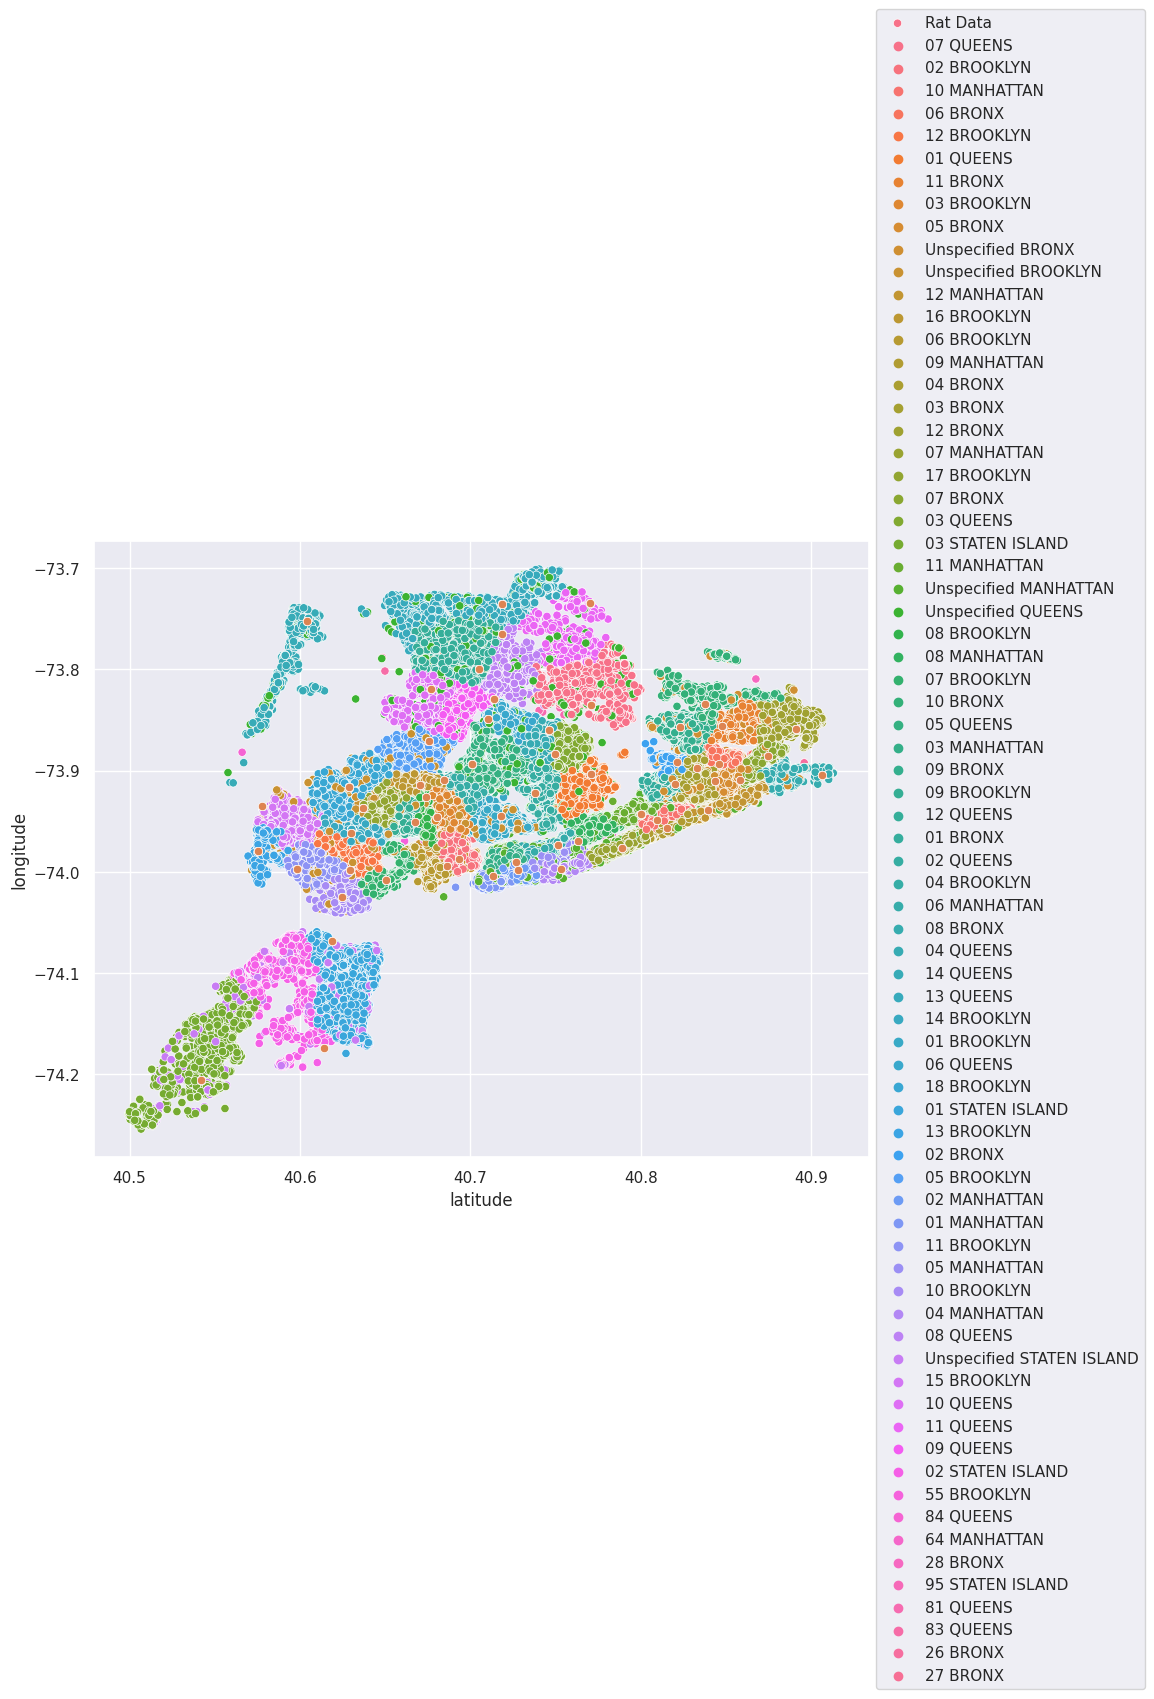

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=rat1, x='latitude', y='longitude', hue='community_board', label='Rat Data', ax=ax)
sns.scatterplot(data=dsny1, x='Latitude', y='Longitude', ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

##DSNY new dataframes / and bools

In [ ]:
dsny1_dist = dsny1.district.unique()
print(f'DSNY districts: {dsny1_dist}')

In [ ]:
BRX = dsny1.drop(dsny1[(dsny1['district'] == 'BKN01') | (dsny1['district'] == 'BKN02') | (dsny1['district'] ==  'BKN03') | (dsny1['district'] == 'BKN04') | (dsny1['district'] == 'BKN05') | (dsny1['district'] == 'BKS06') | (dsny1['district'] == 'BKS07') | (dsny1['district'] == 'BKN08')|(dsny1['district'] == 'BKN09') |
                      (dsny1['district'] == 'BKS10') | (dsny1['district'] == 'BKS11') | (dsny1['district'] ==  'BKS12') | (dsny1['district'] == 'BKS13') | (dsny1['district'] == 'BKS14') | (dsny1['district'] == 'BKS15') | (dsny1['district'] == 'BKN16') | (dsny1['district'] == 'BKN17')|(dsny1['district'] == 'BKS18') |
                      (dsny1['district'] == 'SI01') | (dsny1['district'] == 'SI02') | (dsny1['district'] == 'SI03') | (dsny1['district'] == 'MN01') | (dsny1['district'] == 'MN02') | (dsny1['district'] == 'MN03') |
                      (dsny1['district'] == 'MN04') | (dsny1['district'] == 'MN05') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') |
                      (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN10') | (dsny1['district'] == 'MN11') | (dsny1['district'] == 'MN12') | (dsny1['district'] == 'QW04') | (dsny1['district'] == 'QW01') | (dsny1['district'] == 'QW02') |
                      (dsny1['district'] == 'QW03') | (dsny1['district'] == 'QW05') | (dsny1['district'] == 'QW06') | (dsny1['district'] == 'QE07') | (dsny1['district'] == 'QE08') | (dsny1['district'] == 'QW09') | (dsny1['district'] == 'QE10') | (dsny1['district'] == 'QE11') |
                      (dsny1['district'] == 'QE12') | (dsny1['district'] == 'QE13') | (dsny1['district'] == 'QE14') ].index)
BRX_dsny = pd.DataFrame(BRX)
print(BRX_dsny.district.unique())


In [ ]:
 BKN = dsny1.drop(dsny1[(dsny1['district'] == 'SI01') | (dsny1['district'] == 'SI02') | (dsny1['district'] == 'SI03') | (dsny1['district'] == 'MN01') | (dsny1['district'] == 'MN02') | (dsny1['district'] == 'MN03') | (dsny1['district'] == 'MN04') | (dsny1['district'] == 'MN05')|
                       (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') |
                       (dsny1['district'] == 'MN10') | (dsny1['district'] == 'MN11') | (dsny1['district'] == 'MN12') | (dsny1['district'] == 'QW04') | (dsny1['district'] == 'QW01') | (dsny1['district'] == 'QW02') | (dsny1['district'] == 'QW03') | (dsny1['district'] == 'QW05') |
                       (dsny1['district'] == 'QW06') | (dsny1['district'] == 'QE07') | (dsny1['district'] == 'QE08') | (dsny1['district'] == 'QW09') | (dsny1['district'] == 'QE10') | (dsny1['district'] == 'QE11') | (dsny1['district'] == 'QE12') | (dsny1['district'] == 'QE13') |
                       (dsny1['district'] == 'QE14') | (dsny1['district'] == 'BX01') | (dsny1['district'] == 'BX02') | (dsny1['district'] == 'BX03') | (dsny1['district'] == 'BX04') | (dsny1['district'] == 'BX05') | (dsny1['district'] == 'BX06') | (dsny1['district'] == 'BX07') |
                       (dsny1['district'] == 'BX08') | (dsny1['district'] == 'BX09') | (dsny1['district'] == 'BX10') | (dsny1['district'] == 'BX11') | (dsny1['district'] == 'BX12')].index)
BKN_dsny = pd.DataFrame(BKN)
print(BKN_dsny.district.unique())

In [ ]:
QNS = dsny1.drop(dsny1[(dsny1['district'] == 'BKN01') | (dsny1['district'] == 'BKN02') | (dsny1['district'] ==  'BKN03') | (dsny1['district'] == 'BKN04') | (dsny1['district'] == 'BKN05') | (dsny1['district'] == 'BKS06') | (dsny1['district'] == 'BKS07') | (dsny1['district'] == 'BKN08')|(dsny1['district'] == 'BKN09') |
                      (dsny1['district'] == 'BKS10') | (dsny1['district'] == 'BKS11') | (dsny1['district'] ==  'BKS12') | (dsny1['district'] == 'BKS13') | (dsny1['district'] == 'BKS14') | (dsny1['district'] == 'BKS15') | (dsny1['district'] == 'BKN16') | (dsny1['district'] == 'BKN17')|(dsny1['district'] == 'BKS18') |
                      (dsny1['district'] == 'SI01') | (dsny1['district'] == 'SI02') | (dsny1['district'] == 'SI03') | (dsny1['district'] == 'MN01') | (dsny1['district'] == 'MN02') | (dsny1['district'] == 'MN03') | (dsny1['district'] == 'MN04') | (dsny1['district'] == 'MN05') | (dsny1['district'] == 'MN06') |
                      (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN10') | (dsny1['district'] == 'MN11') |
                      (dsny1['district'] == 'MN12') | (dsny1['district'] == 'BX01') | (dsny1['district'] == 'BX02') | (dsny1['district'] == 'BX03') | (dsny1['district'] == 'BX04') | (dsny1['district'] == 'BX05') | (dsny1['district'] == 'BX06') | (dsny1['district'] == 'BX07') | (dsny1['district'] == 'BX08') |
                      (dsny1['district'] == 'BX09') | (dsny1['district'] == 'BX10') | (dsny1['district'] == 'BX11') | (dsny1['district'] == 'BX12')].index)
QNS_dsny = pd.DataFrame(QNS)
print(QNS_dsny.district.unique())

In [ ]:
SI = dsny1.drop(dsny1[(dsny1['district'] == 'BKN01') | (dsny1['district'] == 'BKN02') | (dsny1['district'] ==  'BKN03') | (dsny1['district'] == 'BKN04') | (dsny1['district'] == 'BKN05') | (dsny1['district'] == 'BKS06') | (dsny1['district'] == 'BKS07') | (dsny1['district'] == 'BKN08')|(dsny1['district'] == 'BKN09') |
                      (dsny1['district'] == 'BKS10') | (dsny1['district'] == 'BKS11') | (dsny1['district'] ==  'BKS12') | (dsny1['district'] == 'BKS13') | (dsny1['district'] == 'BKS14') | (dsny1['district'] == 'BKS15') | (dsny1['district'] == 'BKN16') | (dsny1['district'] == 'BKN17')|(dsny1['district'] == 'BKS18') | (dsny1['district'] == 'MN01') | (dsny1['district'] == 'MN02') | (dsny1['district'] == 'MN03') | (dsny1['district'] == 'MN04') | (dsny1['district'] == 'MN05') | (dsny1['district'] == 'BX01') |
                      (dsny1['district'] == 'BX02') | (dsny1['district'] == 'BX03') | (dsny1['district'] == 'BX04') | (dsny1['district'] == 'BX05') | (dsny1['district'] == 'BX06') | (dsny1['district'] == 'BX07') | (dsny1['district'] == 'BX08') | (dsny1['district'] == 'BX09') |
                      (dsny1['district'] == 'BX10') | (dsny1['district'] == 'BX11') | (dsny1['district'] == 'BX12') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN06') |
                      (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN10') | (dsny1['district'] == 'MN11') | (dsny1['district'] == 'MN12') | (dsny1['district'] == 'QW04') | (dsny1['district'] == 'QW01') |
                      (dsny1['district'] == 'QW02') | (dsny1['district'] == 'QW03') | (dsny1['district'] == 'QW05') | (dsny1['district'] == 'QW06') | (dsny1['district'] == 'QE07') | (dsny1['district'] == 'QE08') | (dsny1['district'] == 'QW09') | (dsny1['district'] == 'QE10') |
                      (dsny1['district'] == 'QE11') | (dsny1['district'] == 'QE12') | (dsny1['district'] == 'QE13') | (dsny1['district'] == 'QE14')].index)
SI_dsny = pd.DataFrame(SI)
print(SI_dsny.district.unique())

In [ ]:
NYC = dsny1.drop(dsny1[(dsny1['district'] == 'BKN01') | (dsny1['district'] == 'BKN02') | (dsny1['district'] ==  'BKN03') | (dsny1['district'] == 'BKN04') | (dsny1['district'] == 'BKN05') | (dsny1['district'] == 'BKS06') | (dsny1['district'] == 'BKS07') | (dsny1['district'] == 'BKN08')|(dsny1['district'] == 'BKN09') |
                      (dsny1['district'] == 'BKS10') | (dsny1['district'] == 'BKS11') | (dsny1['district'] ==  'BKS12') | (dsny1['district'] == 'BKS13') | (dsny1['district'] == 'BKS14') | (dsny1['district'] == 'BKS15') | (dsny1['district'] == 'BKN16') | (dsny1['district'] == 'BKN17')|(dsny1['district'] == 'BKS18') |
                      (dsny1['district'] == 'QW04') | (dsny1['district'] == 'QW01') | (dsny1['district'] == 'QW02') | (dsny1['district'] == 'QW03') | (dsny1['district'] == 'QW05') | (dsny1['district'] == 'QW06') | (dsny1['district'] == 'QE07') | (dsny1['district'] == 'QE08') | (dsny1['district'] == 'QW09') |
                      (dsny1['district'] == 'QE10') | (dsny1['district'] == 'QE11') | (dsny1['district'] == 'QE12') | (dsny1['district'] == 'QE13') | (dsny1['district'] == 'QE14') | (dsny1['district'] == 'SI01') | (dsny1['district'] == 'SI02') | (dsny1['district'] == 'SI03') | (dsny1['district'] == 'BX01') |
                      (dsny1['district'] == 'BX02') | (dsny1['district'] == 'BX03') | (dsny1['district'] == 'BX04') | (dsny1['district'] == 'BX05') | (dsny1['district'] == 'BX06') | (dsny1['district'] == 'BX07') | (dsny1['district'] == 'BX08') | (dsny1['district'] == 'BX09') | (dsny1['district'] == 'BX10') |
                      (dsny1['district'] == 'BX11') | (dsny1['district'] == 'BX12')].index)
NYC_dsny = pd.DataFrame(NYC)
print(NYC_dsny.district.unique())

In [ ]:
NYC_dsny.head()

##rat sightings to new df/boroughs

In [ ]:
rat1.columns

In [ ]:
rat1_dist = rat1['community_board'].dropna().unique()

# Create a new DataFrame with all columns for the unique values of 'community_board'
rat1_dist2 = rat1[rat1['community_board'].isin(rat1_dist)].copy()

print(f'Community Board districts: \n{rat1_dist2}')

In [ ]:
BRX_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('onx', case=False)]
print(f'Community Board districts: \n{BRX_rats}')

In [ ]:
QNS_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('queen', case=False)]
print(f'Community Board districts: \n{QNS_rats}')

In [ ]:
NYC_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('manh', case=False)]
print(f'Community Board districts: \n{NYC_rats}')

In [ ]:
BKN_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('rook', case=False)]
print(f'Community Board districts: \n{BKN_rats}')

In [ ]:
SI_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('stat', case=False)]
print(f'Community Board districts: \n{SI_rats}')

#check min max report dates for each of the boroughs

In [ ]:
min_date = min(BRX_rats['created_date'])
max_date = max(BRX_rats['created_date'])
print('Bronx Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

In [ ]:
min_date = min(BKN_rats['created_date'])
max_date = max(BKN_rats['created_date'])
print('Brooklyn Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

In [ ]:
min_date = min(NYC_rats['created_date'])
max_date = max(NYC_rats['created_date'])
print('Manhattan Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

In [ ]:
min_date = min(QNS_rats['created_date'])
max_date = max(QNS_rats['created_date'])
print('Queens Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

In [ ]:
min_date = min(SI_rats['created_date'])
max_date = max(SI_rats['created_date'])
print('Staten Island Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

years...2023,2022

Values...these need rethought

In [ ]:
# rat_locations = set(rat1[['longitude', 'latitude', 'the_geom', 'modztca']])

In [ ]:
# dsny_locations = set(dsny1[['Longitude', 'Latitude', 'multipolygon-1','post_code']])

# Exports

In [ ]:
# Export Selected Columns to CSV File
#column_names = ['', '','']
#df.to_csv("c:/tmp/courses.csv",index=False, columns=column_names)

# Writes Content to CSV File

In [ ]:
# BRX_dsny {BRX_dsny}
# brx_rats {brx_rats}
# BKN_dsny {BKN_dsny}
# bkn_rats {bkn_rats}
# NYC_dsny {NYC_dsny}
# nyc_rats {nyc_rats}
# QNS_dsny {QNS_dsny}
# qns_rats {qns_rats}
# SI_dsny  {SI_dsny}
# si_rats  {si_rats}

##Print to file

In [ ]:
# BRX_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BRX_dsny.csv")
# BRX_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BRX_rats.csv")
# BKN_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BKN_dsny.csv")
# BKN_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BKN_rats.csv")
# NYC_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/NYC_dsny.csv")
# NYC_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/NYC_rats.csv")
# QNS_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/QNS_dsny.csv")
# QNS_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/QNS_rats.csv")
# SI_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/SI_dsny.csv")
# SI_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/SI_rats.csv")

# rat1.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rat1.csv")
# dsny1.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/dsny1.csv")